# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

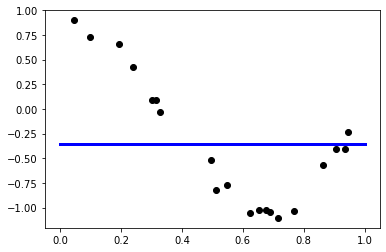

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok')
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


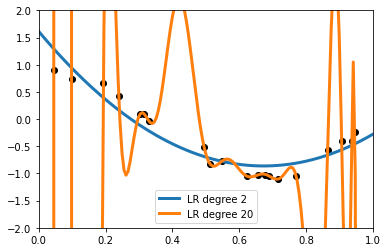

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

elastic net 1
elastic net 10000
elastic net 0.0001


C:\Anaconda\envs\pythonProject5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e-03, tolerance: 8.247e-04
  model = cd_fast.enet_coordinate_descent(


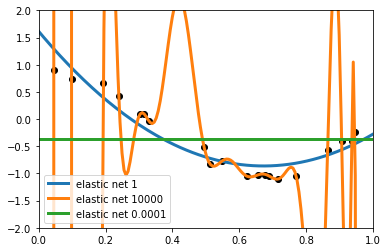

In [5]:
alpha = [1,10000,0.0001]
models = []
names = []
for a in alpha:
    m = ((make_pipeline(PolynomialFeatures(20), ElasticNet(a))),f'elastic net {a}')
    models.append(m)

for model,name in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

plt.plot(x, y, 'ok')
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [10]:
from sklearn.model_selection import GridSearchCV

grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [i for i in range(1,15)],
                    'elasticnet__alpha': [10**i for i in range(-5,5)]},
                    refit=True)

grid_1.fit(x,y)
grid_1.best_params_

C:\Anaconda\envs\pythonProject5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.737e-02, tolerance: 2.770e-04
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\envs\pythonProject5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.156e-02, tolerance: 7.647e-04
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\envs\pythonProject5\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

{'elasticnet__alpha': 0.0001, 'polynomialfeatures__degree': 5}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [i for i in range(1,15,1)],
                    'elasticnet__alpha' : [10**i for i in range(-5,5,1)]},
                    refit=True)
grid.fit(X_train,y_train)
print('=========================================')
print(grid.best_params_)
print('=========================================')
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, grid.predict(X_test)) ))
print("r2 score: {}".format( metrics.r2_score(y_test, grid.predict(X_test)) ))

{'elasticnet__alpha': 1e-05, 'polynomialfeatures__degree': 3}
Mean squared error: 0.8696934215766458
r2 score: 0.9669613126604294
